In [135]:
import os
import tarfile
from six.moves import urllib
from pathlib import Path

In [136]:
import pandas as pd
import numpy as np

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Data

In [138]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = Path('datasets/housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'
DOWNLOAD_DATA = False

In [139]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = housing_path / 'housing.tgz'
    urllib.request.urlretrieve(housing_url, tgz_path) # Get the zip file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [140]:
if DOWNLOAD_DATA:
    fetch_housing_data()

In [141]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path / 'housing.csv'
    return pd.read_csv(csv_path)

housing = load_housing_data()

## Exploration

In [142]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [143]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [144]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [145]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


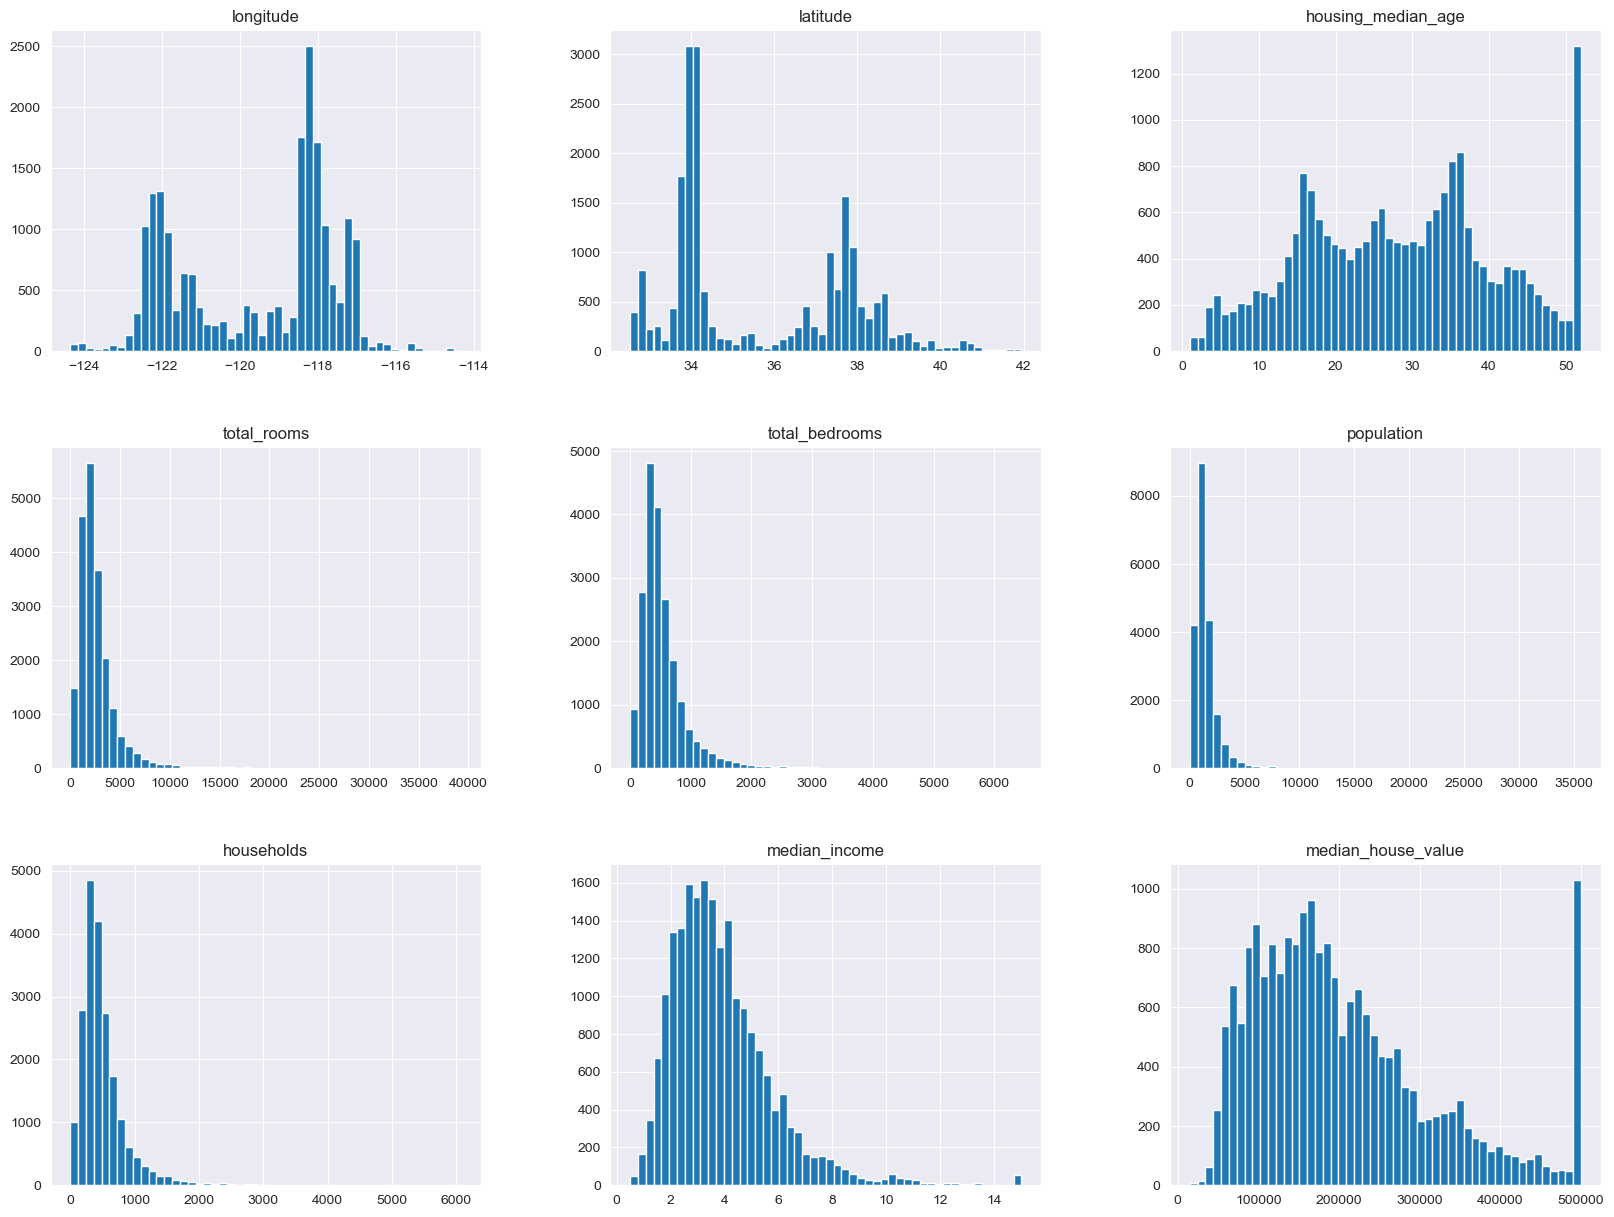

In [146]:
housing.hist(bins=50, figsize=(20, 15));

## Test Set

In [147]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [148]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'Train set shape: {train_set.shape}')
print(f'Test set shape: {test_set.shape}')

Train set shape: (16512, 10)
Test set shape: (4128, 10)


In [149]:
# Income categories for stratification
housing['income_cat'] = np.ceil(housing.median_income / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

housing['income_cat'].value_counts(sort=False)

5.0    2362
4.0    3639
3.0    7236
2.0    6581
1.0     822
Name: income_cat, dtype: int64

In [150]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print(f'Stratified train set shape: {strat_train_set.shape}')
print(f'Stratified test set shape: {strat_test_set.shape}')

Stratified train set shape: (16512, 11)
Stratified test set shape: (4128, 11)


In [151]:
# Remove the `income_cat` column now that it is no longer useful
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Insights

In [152]:
from pandas.plotting import scatter_matrix

In [153]:
housing = strat_train_set.copy()

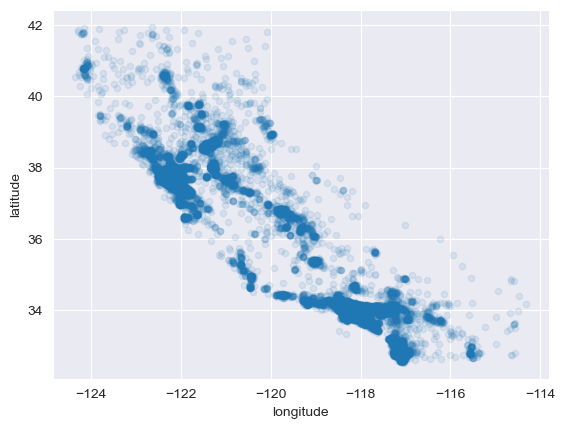

In [154]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

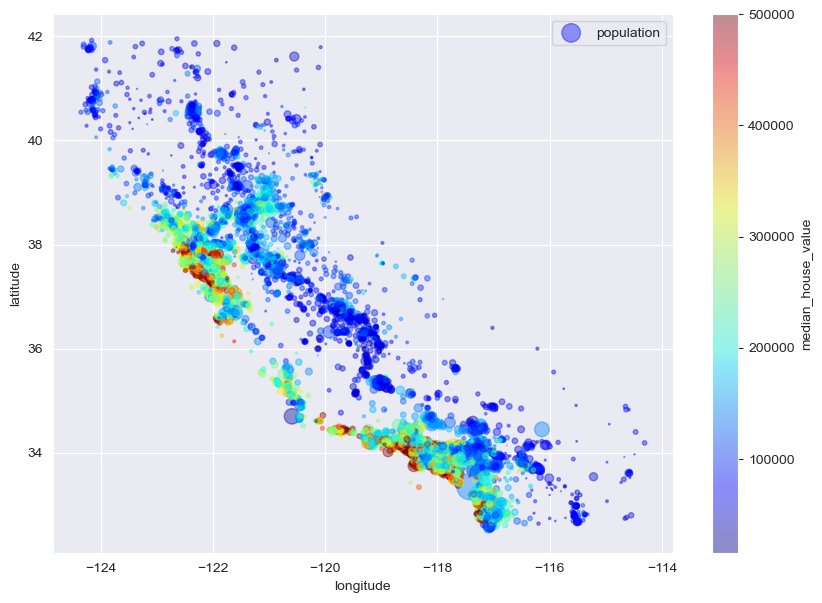

In [155]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing.population / 100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True);

In [156]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

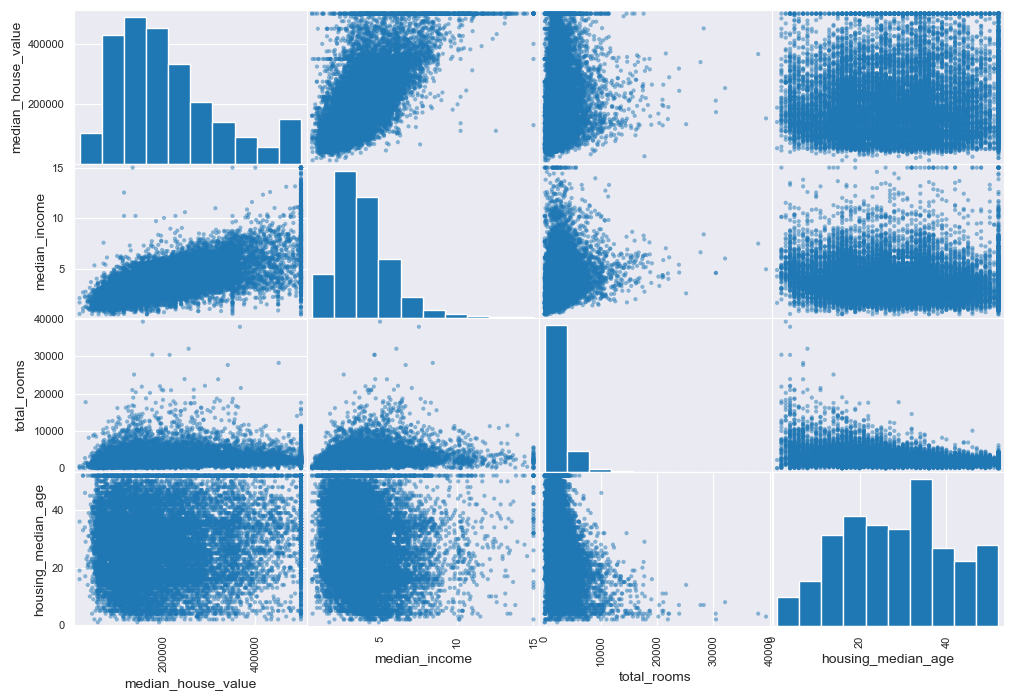

In [157]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8));

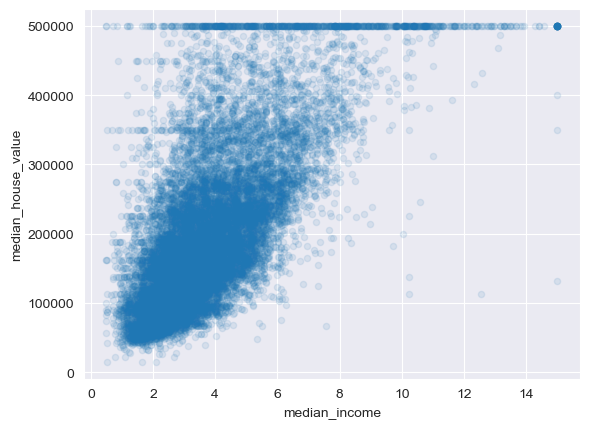

In [158]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

In [159]:
# New attributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Create Labels

In [160]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Data Cleaning

In [161]:
from sklearn.impute import SimpleImputer

### Fill NA

In [162]:
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [163]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [164]:
housing_num.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [165]:
X = imputer.transform(housing_num)  # Replace missing values with median
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

### Categorical

In [166]:
from sklearn.preprocessing import OneHotEncoder

In [167]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [168]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

In [169]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [170]:
# OneHotEncoder() can direclty work with categorical values. No need to call factorize() first
encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [171]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformer

In [172]:
from sklearn.base import BaseEstimator, TransformerMixin

In [173]:
rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # Nothing to do 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx] / X[:, household_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [174]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing.shape, housing_extra_attribs.shape

((16512, 9), (16512, 11))

### Pipeline

In [175]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [176]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

### DataFrame Compatibility

In [177]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [178]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# Recreate the pipeline to directly use the dataframe
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [179]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [180]:
from sklearn.pipeline import FeatureUnion

In [181]:
full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [182]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

## Train Model

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

### Linear Regression

In [186]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels);

In [189]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Labels: ', some_labels.values)

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [ 72100. 279600.  82700. 112500. 238300.]


In [191]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

### Decision Tree

In [193]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [194]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

### Cross Validation

In [195]:
from sklearn.model_selection import cross_val_score

In [197]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         cv = 10, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)

In [198]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Standard Deviation: {scores.std()}')

In [199]:
display_scores(tree_rmse_scores)

Scores: [72602.8714708  70239.03106213 67861.88998325 70019.26080464
 69202.91201367 77266.57792511 71556.66015319 73321.45506127
 69042.3038633  72213.52134446]
Mean: 71332.64836818133
Standard Deviation: 2575.9476241018533


### Random Forests

In [200]:
from sklearn.ensemble import RandomForestRegressor

In [201]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         cv = 10, scoring='neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-scores)


array([51638.75003926, 48752.01187722, 46711.28315656, 52341.31085576,
       47308.26419418, 52106.07539101, 52742.62182498, 49447.06082202,
       48663.33080282, 53915.6633312 ])

In [204]:
display_scores(forest_rmse_scores)

Scores: [51638.75003926 48752.01187722 46711.28315656 52341.31085576
 47308.26419418 52106.07539101 52742.62182498 49447.06082202
 48663.33080282 53915.6633312 ]
Mean: 50362.63722950243
Standard Deviation: 2363.3266536703386


### Grid Search

In [203]:
from sklearn.model_selection import GridSearchCV

In [205]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [206]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [207]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [209]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65197.13924173915 {'max_features': 2, 'n_estimators': 3}
55517.54818971014 {'max_features': 2, 'n_estimators': 10}
53080.732459513 {'max_features': 2, 'n_estimators': 30}
59973.754227008685 {'max_features': 4, 'n_estimators': 3}
52988.06198708655 {'max_features': 4, 'n_estimators': 10}
50205.047291921466 {'max_features': 4, 'n_estimators': 30}
58337.67411079911 {'max_features': 6, 'n_estimators': 3}
51874.71358137652 {'max_features': 6, 'n_estimators': 10}
50081.54702680526 {'max_features': 6, 'n_estimators': 30}
59654.74151871137 {'max_features': 8, 'n_estimators': 3}
51951.41333754323 {'max_features': 8, 'n_estimators': 10}
49756.39807453313 {'max_features': 8, 'n_estimators': 30}
62497.11463841373 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53911.713122816494 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59859.36205397052 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52428.74064591196 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### Analyze model and importance

In [210]:
best_estimator = grid_search.best_estimator_
feature_importances = best_estimator.feature_importances_
feature_importances

array([6.72969983e-02, 6.15380847e-02, 4.38610350e-02, 1.47301293e-02,
       1.46095340e-02, 1.47024042e-02, 1.47938837e-02, 3.49286423e-01,
       6.26506942e-02, 1.15117373e-01, 5.08922254e-02, 9.35757596e-03,
       1.76622043e-01, 9.01150196e-05, 1.69765748e-03, 2.75382418e-03])

In [218]:
extra_attribs = ['rooms_per_hhod', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3492864227488074, 'median_income'),
 (0.1766220426547977, 'INLAND'),
 (0.11511737309739663, 'pop_per_hhold'),
 (0.06729699829252428, 'longitude'),
 (0.06265069419683984, 'rooms_per_hhod'),
 (0.0615380847050434, 'latitude'),
 (0.05089222539964375, 'bedrooms_per_room'),
 (0.04386103503506709, 'housing_median_age'),
 (0.014793883716101026, 'households'),
 (0.014730129275671248, 'total_rooms'),
 (0.014702404231465493, 'population'),
 (0.014609534002277986, 'total_bedrooms'),
 (0.00935757596037229, '<1H OCEAN'),
 (0.002753824181811841, 'NEAR OCEAN'),
 (0.0016976574826182195, 'NEAR BAY'),
 (9.011501956188453e-05, 'ISLAND')]

### Test set evaluation

In [219]:
final_model = best_estimator

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'Test RMSE: {final_rmse}')

Test RMSE: 47686.69776475454
